In [ ]:
from google.colab import files
upload = files.upload()

Saving stroke_risk_dataset.csv to stroke_risk_dataset.csv


Importing Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, r2_score

Loading the Dataset

Data Exploration

In [ ]:
df = pd.read_csv('/content/stroke_risk_dataset.csv')

# Now you can use df:
print(df.head())
print(df.info())
print(df.describe())

   Chest Pain  Shortness of Breath  Irregular Heartbeat  Fatigue & Weakness  \
0           0                    1                    1                   1   
1           0                    0                    1                   0   
2           1                    0                    0                   1   
3           1                    0                    1                   1   
4           0                    0                    1                   0   

   Dizziness  Swelling (Edema)  Pain in Neck/Jaw/Shoulder/Back  \
0          0                 0                               0   
1          0                 1                               0   
2          1                 1                               0   
3          0                 1                               1   
4          0                 1                               0   

   Excessive Sweating  Persistent Cough  Nausea/Vomiting  High Blood Pressure  \
0                   1                 1        

Data Visualization

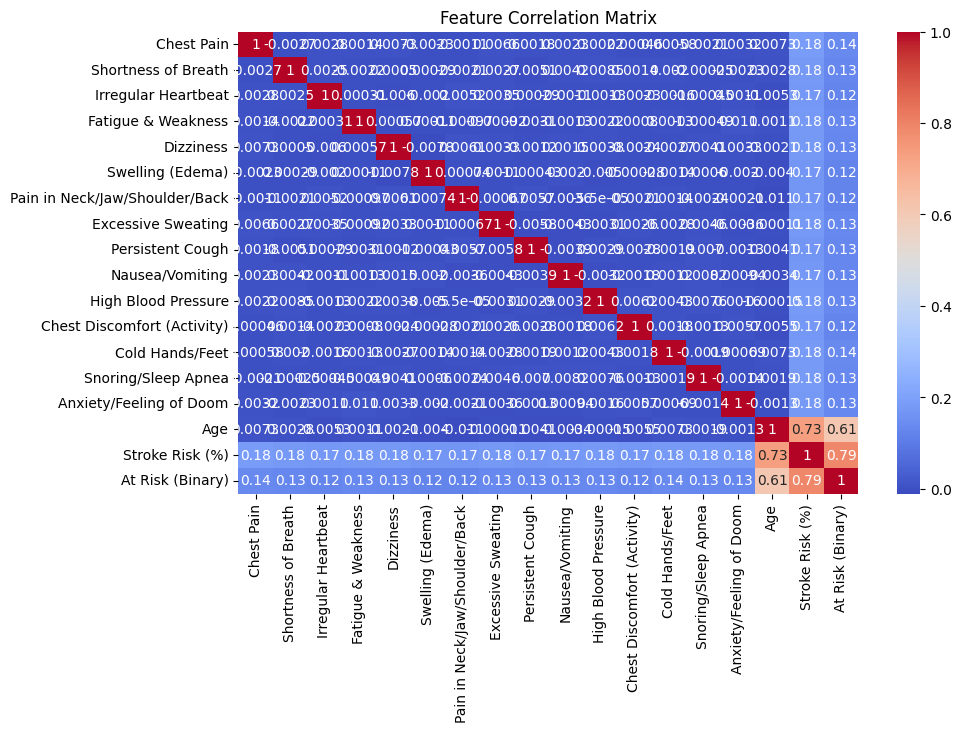

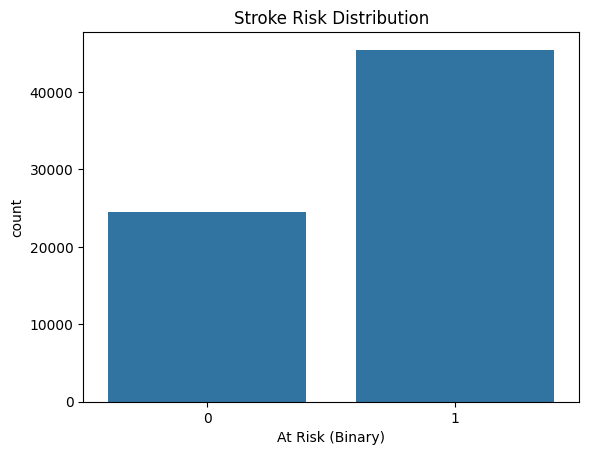

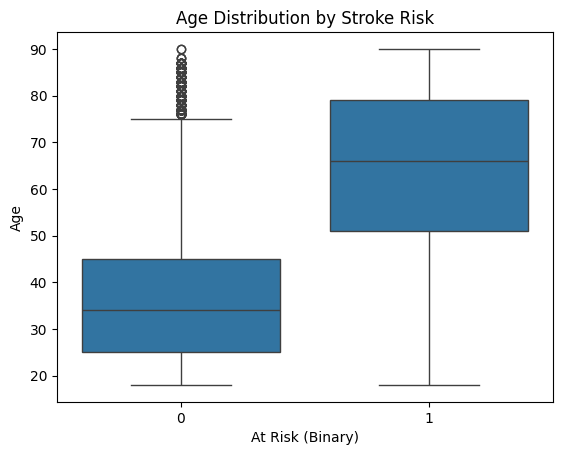

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

sns.countplot(x='At Risk (Binary)', data=df)
plt.title("Stroke Risk Distribution")
plt.show()

sns.boxplot(x='At Risk (Binary)', y='Age', data=df)
plt.title("Age Distribution by Stroke Risk")
plt.show()

Feature selection

In [ ]:
X = df.drop(columns=['Stroke Risk (%)', 'At Risk (Binary)'])  # Features
y_classification = df['At Risk (Binary)']  # Binary classification target
y_regression = df['Stroke Risk (%)']  # Regression target

Train-Test Split

In [ ]:
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_classification, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)

Data scaling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train_reg = scaler.fit_transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)

Model training - Random Forest (Binary Classification)

In [ ]:
rf_class_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_class_model.fit(X_train, y_train_class)
y_pred_rf_class = rf_class_model.predict(X_test)

y_pred_rf_prob = rf_class_model.predict_proba(X_test)[:, 1]

Model training - XGBoost (Binary Classification)

In [ ]:
xgb_class_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_class_model.fit(X_train, y_train_class)
y_pred_xgb_class = xgb_class_model.predict(X_test)
y_pred_xgb_prob = xgb_class_model.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:30:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model training - Random Forest (Regression)

In [ ]:
rf_reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg_model.fit(X_train_reg, y_train_reg)
y_pred_rf_reg = rf_reg_model.predict(X_test_reg)

Model training - XGBoost (Regression)

In [ ]:
xgb_reg_model = XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgb_reg_model.fit(X_train_reg, y_train_reg)
y_pred_xgb_reg = xgb_reg_model.predict(X_test_reg)

Evaluation - Classification

In [ ]:
!pip install scikit-learn
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, r2_score, precision_score, recall_score, roc_auc_score

def evaluate_classification(model_name, y_test, y_pred, y_pred_prob):
    print(f"\n--- {model_name} Performance (Binary Classification) ---\n")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("AUC:", roc_auc_score(y_test, y_pred_prob))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

evaluate_classification("Random Forest", y_test_class, y_pred_rf_class, y_pred_rf_prob)
evaluate_classification("XGBoost", y_test_class, y_pred_xgb_class, y_pred_xgb_prob)



--- Random Forest Performance (Binary Classification) ---

Accuracy: 0.9481428571428572
Precision: 0.95376786487657
Recall: 0.9671717171717171
AUC: 0.9912780530248267
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92      4892
           1       0.95      0.97      0.96      9108

    accuracy                           0.95     14000
   macro avg       0.95      0.94      0.94     14000
weighted avg       0.95      0.95      0.95     14000

Confusion Matrix:
 [[4465  427]
 [ 299 8809]]

--- XGBoost Performance (Binary Classification) ---

Accuracy: 0.997
Precision: 0.9970394736842105
Recall: 0.9983530961791831
AUC: 0.9998824409619318
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      4892
           1       1.00      1.00      1.00      9108

    accuracy                           1.00     14000
   macro avg       1.00      1.00      1.0

Evaluation - Regression

In [ ]:
from sklearn.metrics import mean_squared_error

def evaluate_regression(model_name, y_test, y_pred):
    print(f"\n--- {model_name} Performance (Regression) ---\n")
    print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
    print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R2 Score:", r2_score(y_test, y_pred))

evaluate_regression("Random Forest", y_test_reg, y_pred_rf_reg)
evaluate_regression("XGBoost", y_test_reg, y_pred_xgb_reg)



--- Random Forest Performance (Regression) ---

Mean Absolute Error: 2.144103571428572
Root Mean Squared Error (RMSE): 2.7055894650836128
R2 Score: 0.9637053077103039

--- XGBoost Performance (Regression) ---

Mean Absolute Error: 1.0762497220039369
Root Mean Squared Error (RMSE): 1.350281605733185
R2 Score: 0.9909600084748627


Feature Importance - Random Forest (Classification)

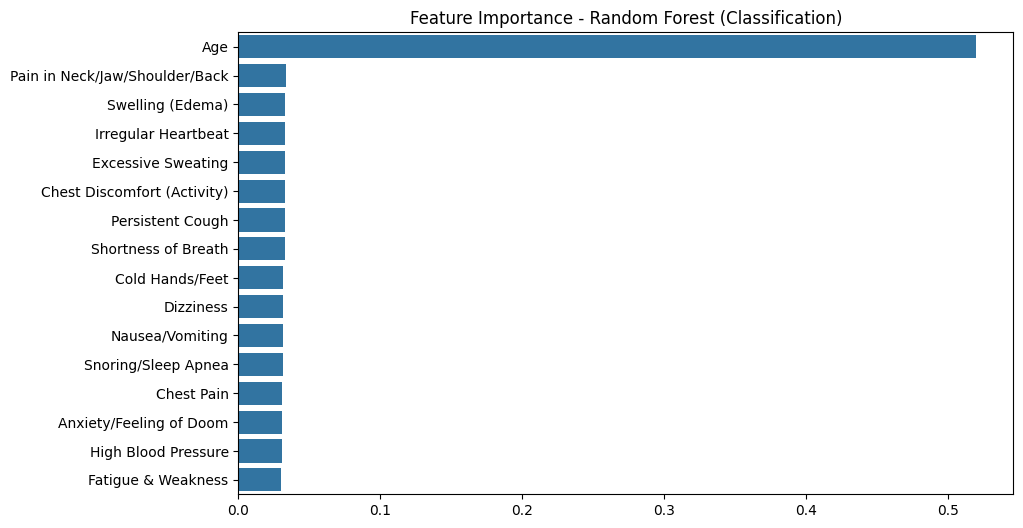

In [ ]:
importances = rf_class_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=[features[i] for i in indices])
plt.title("Feature Importance - Random Forest (Classification)")
plt.show()


Feature Importance - Random Forest (Regression)

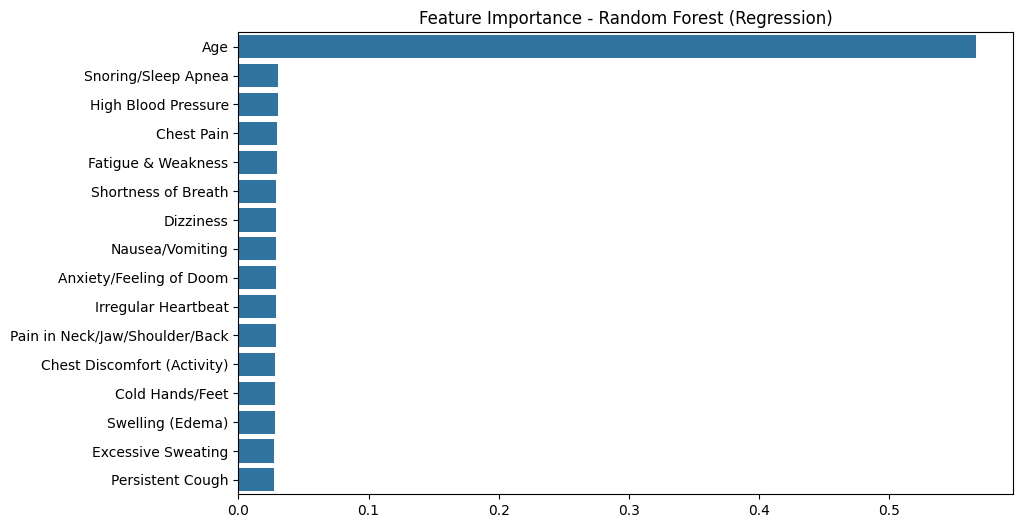

In [ ]:
importances_reg = rf_reg_model.feature_importances_
indices_reg = np.argsort(importances_reg)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances_reg[indices_reg], y=[features[i] for i in indices_reg])
plt.title("Feature Importance - Random Forest (Regression)")
plt.show()


Saving the model

In [ ]:
import pickle


with open("stroke_clf.pkl", "wb") as f:
    pickle.dump(clf_model, f)


with open("stroke_reg.pkl", "wb") as f:
    pickle.dump(reg_model, f)

print("Models saved successfully!")

NameError: name 'clf_model' is not defined

In [ ]:
import pickle

# Assign your trained models to clf_model and reg_model
clf_model = rf_class_model  # Assuming rf_class_model is your classification model
reg_model = rf_reg_model  # Assuming rf_reg_model is your regression model

with open("stroke_clf.pkl", "wb") as f:
    pickle.dump(clf_model, f)

with open("stroke_reg.pkl", "wb") as f:
    pickle.dump(reg_model, f)

print("Models saved successfully!")

Models saved successfully!


Loading the model

In [ ]:
import pickle


with open("stroke_clf.pkl", "rb") as f:
    clf_model = pickle.load(f)


with open("stroke_reg.pkl", "rb") as f:
    reg_model = pickle.load(f)

print("Models loaded successfully!")


Models loaded successfully!


In [ ]:
from google.colab import files
files.download("stroke_clf.pkl")
files.download("stroke_reg.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download("stroke_clf.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import google.colab
import matplotlib
import numpy
import pandas
import pickle
import seaborn
import sklearn
import xgboost

# Print versions
print("google.colab:", "Built-in Colab library")
print("matplotlib:", matplotlib.__version__)  # Changed _version_ to __version__
print("numpy:", numpy.__version__)
print("pandas:", pandas.__version__)
print("pickle:", "Built-in Python library")
print("seaborn:", seaborn.__version__)
print("sklearn:", sklearn.__version__)
print("xgboost:", xgboost.__version__)

google.colab: Built-in Colab library
matplotlib: 3.10.0
numpy: 1.26.4
pandas: 2.2.2
pickle: Built-in Python library
seaborn: 0.13.2
sklearn: 1.6.1
xgboost: 2.1.4


In [ ]:
import pandas as pd

df = pd.read_csv('/content/stroke_risk_dataset.csv')

# Display the features (column names)
print("Features (Columns) in the DataFrame:")
print(df.columns)

# Now you can use df:
print(df.head())
print(df.info())
print(df.describe())

Features (Columns) in the DataFrame:
Index(['Chest Pain', 'Shortness of Breath', 'Irregular Heartbeat',
       'Fatigue & Weakness', 'Dizziness', 'Swelling (Edema)',
       'Pain in Neck/Jaw/Shoulder/Back', 'Excessive Sweating',
       'Persistent Cough', 'Nausea/Vomiting', 'High Blood Pressure',
       'Chest Discomfort (Activity)', 'Cold Hands/Feet', 'Snoring/Sleep Apnea',
       'Anxiety/Feeling of Doom', 'Age', 'Stroke Risk (%)',
       'At Risk (Binary)'],
      dtype='object')
   Chest Pain  Shortness of Breath  Irregular Heartbeat  Fatigue & Weakness  \
0           0                    1                    1                   1   
1           0                    0                    1                   0   
2           1                    0                    0                   1   
3           1                    0                    1                   1   
4           0                    0                    1                   0   

   Dizziness  Swelling (Edema)  Pain 

In [ ]:
import numpy as np
import pickle


with open("/content/stroke_clf.pkl", "rb") as f:
    clf_model = pickle.load(f)

with open("/content/stroke_reg.pkl", "rb") as f:
    reg_model = pickle.load(f)


# Example values: [Chest Pain, Shortness of Breath, Irregular Heartbeat, Fatigue & Weakness,
# Dizziness, Swelling (Edema), Pain in Neck/Jaw/Shoulder/Back, Excessive Sweating,
# Persistent Cough, Nausea/Vomiting, High Blood Pressure, Chest Discomfort (Activity),
# Cold Hands/Feet, Snoring/Sleep Apnea, Anxiety/Feeling of Doom, Age]

sample_input = np.array([[1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 65]])  # Modify values as needed

# Classification Prediction (Stroke Risk: Yes/No)
classification_result = clf_model.predict(sample_input)
print("Stroke Risk (Yes/No):", "Yes" if classification_result[0] == 1 else "No")

# Regression Prediction (Stroke Risk Percentage)
regression_result = reg_model.predict(sample_input)
print("Stroke Risk Percentage:", round(regression_result[0], 2), "%")


Stroke Risk (Yes/No): Yes
Stroke Risk Percentage: 91.36 %
